In [1]:
#imports
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
rawData = pd.read_csv('cmc.csv')
print(rawData.shape)
rawData.head()

(1472, 10)


,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
24     1472 non-null int64
2      1472 non-null int64
3      1472 non-null int64
3.1    1472 non-null int64
1      1472 non-null int64
1.1    1472 non-null int64
2.1    1472 non-null int64
3.2    1472 non-null int64
0      1472 non-null int64
1.2    1472 non-null int64
dtypes: int64(10)
memory usage: 115.1 KB


In [4]:
###################################Recopilación de datos, preprocesamiento e ingeniería de características
rawData.columns=['wifeAge', 'wifeEducation','husbandEducation','numberChildren','wifeReligion','wifeWorking', 'husbandOccupation', 'standardLiving','mediaExposure', 'contraceptiveUsed']

In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
wifeAge              1472 non-null int64
wifeEducation        1472 non-null int64
husbandEducation     1472 non-null int64
numberChildren       1472 non-null int64
wifeReligion         1472 non-null int64
wifeWorking          1472 non-null int64
husbandOccupation    1472 non-null int64
standardLiving       1472 non-null int64
mediaExposure        1472 non-null int64
contraceptiveUsed    1472 non-null int64
dtypes: int64(10)
memory usage: 115.1 KB


In [6]:
rawData.head()

,wifeAge,wifeEducation,husbandEducation,numberChildren,wifeReligion,wifeWorking,husbandOccupation,standardLiving,mediaExposure,contraceptiveUsed
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [7]:
#################Remplazo de valores de la columna :contraceptiveUsed: 
#Valores actuales 1=No-use, 2=Long-term, 3=Short-term.
#Se asumira que el valor de 2=Long-term, 3=Short-term sean uno solo ya que ambos indican que la esposa utiliza,
#un metodo anticonceptivo.
# Se reemplaza el valor de 3=Short-term a 2.

rawData.replace({'contraceptiveUsed' : 3}, 2, inplace=True)


In [8]:
rawData.head(n=100)

,wifeAge,wifeEducation,husbandEducation,numberChildren,wifeReligion,wifeWorking,husbandOccupation,standardLiving,mediaExposure,contraceptiveUsed
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...
95,41,2,3,1,1,0,2,3,0,1
96,28,4,4,5,1,1,2,1,0,1
97,17,2,2,3,1,1,3,1,0,1
98,27,2,3,5,1,1,2,1,0,1


In [9]:
###################################Exploratory Data Analysis

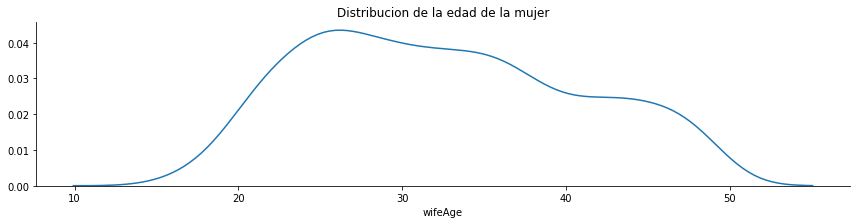

In [10]:
# Distribucion de la edad de la mujer
dist_wifeAge = sns.FacetGrid(rawData, aspect=4)
dist_wifeAge.map(sns.kdeplot, 'wifeAge')
dist_wifeAge.set(title='Distribucion de la edad de la mujer')

## se observa que la edad va desde 15 años hasta 50 años aproximadamente. Se concentran entre 25 y 35 años.  

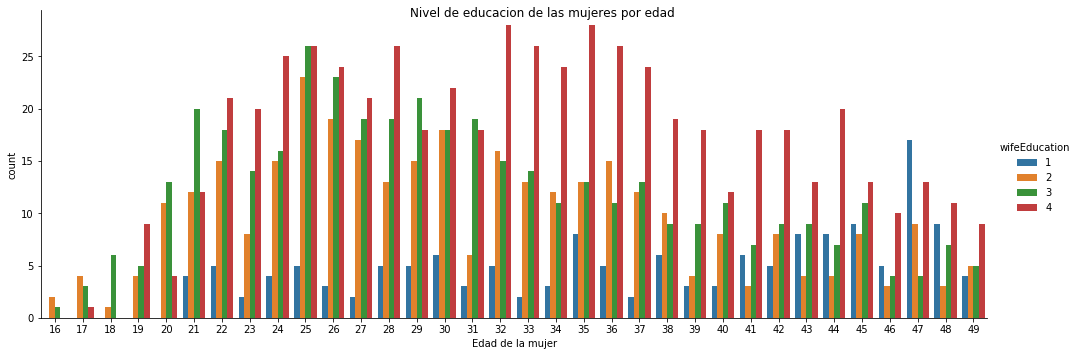

In [11]:
#Nivel de educacion de las mujeres por edad
edad_educacion = sns.catplot('wifeAge', data=rawData, hue='wifeEducation', kind='count', aspect=2.75)
edad_educacion.fig.suptitle('Nivel de educacion de las mujeres por edad')
edad_educacion.set_xlabels('Edad de la mujer')



## el grafico nos muestra que la cantidad de mujeres con nivel de educacion alto(4) se da en edades de 32 a 38 años.
## el nivel educativo bajo(1) no esta presenbte en el rango de edad de 16 a 20 años.
## el nivel educativo medio bajo (2) esta presente en todas las edades.
## el nivel educativo medio alto (3) tiene su mayor presencia en el rango de edad de 21 a 29 años.

Text(0.5, 0.98, 'Nivel de educacion de las mujeres')

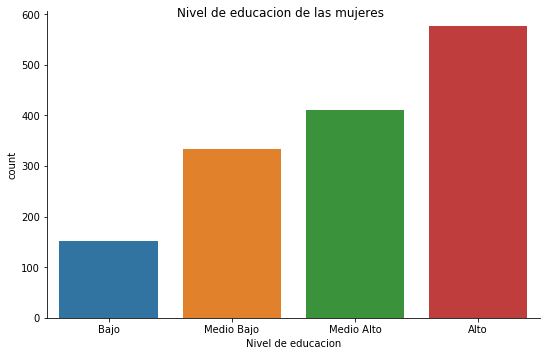

In [12]:
#Nivel de educacion de las mujeres
wifeEducation = sns.catplot('wifeEducation', data=rawData, kind='count', aspect=1.5)
wifeEducation.set_xlabels('Nivel de educacion')
wifeEducation.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
wifeEducation.fig.suptitle('Nivel de educacion de las mujeres')

##El nivel de educacion Alto con casi 600 mujeres, el nivel medio con alrededor 700 mujeres, el nivel de educacion
## bajo con alrdedor de 150 mujeres.

Text(0.5, 0.98, 'Nivel de educacion de las hombres')

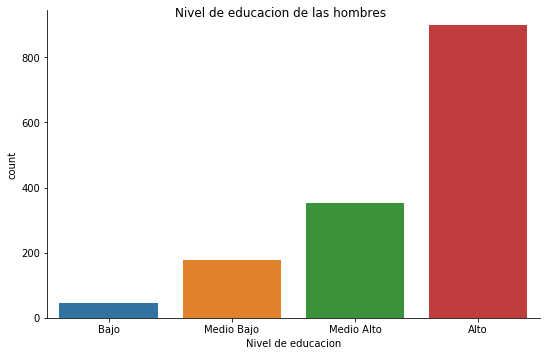

In [13]:
#Nivel de educacion de las hombres
husbandEducation = sns.catplot('husbandEducation', data=rawData, kind='count', aspect=1.5)
husbandEducation.set_xlabels('Nivel de educacion')
husbandEducation.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
husbandEducation.fig.suptitle('Nivel de educacion de las hombres')

##el nivel de educacion Alto superior a los 800 hombres, el nivel medio con alrededor 550 hombres, el nivel de educacion
## bajo con menos de 100.

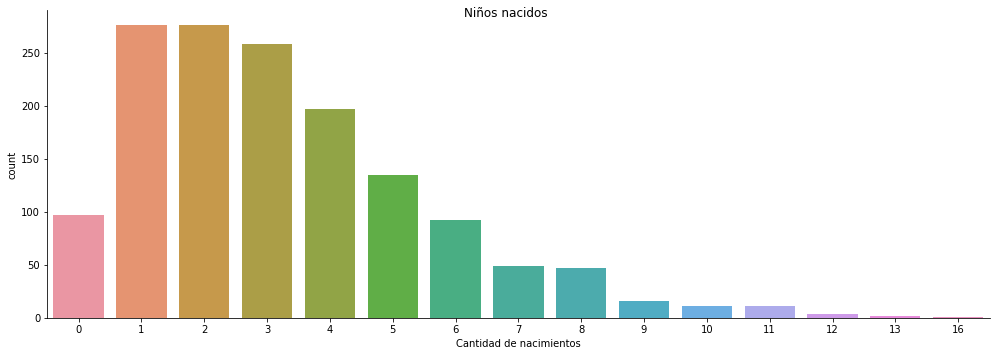

In [14]:
#Cantidad de niños nacidos
numberChildren = sns.catplot('numberChildren', data=rawData, kind='count', aspect=2.75)
numberChildren.fig.suptitle('Niños nacidos')
numberChildren.set_xlabels('Cantidad de nacimientos')


# alrededor de 100 mujeres no han tenido niños.
#La mayor cantidad de nacimientos esta en el rango de 1 a 4 nacimientos.

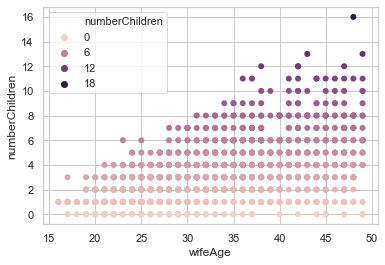

In [15]:
#Edad de las mujeres y cantidad de nacimientos
sns.set(style="whitegrid")
sns.scatterplot(x="wifeAge", y="numberChildren", data=rawData,linewidth=0,hue="numberChildren")

#en el rango de edad de 16 a 27 años la mayoria de mujeres no presenta nacimientos.
#en el rango de edad de 21 a 25 años la cantidad de nacimiento es 1.
#en el rango de 22 a 26 años la cantidad de nacimientos es 2 a 3.
#en el rango de 32 y 35 años la cantidad de nacimientos es 5 a 7.
#en el rango de 36 y 38 años la cantidad de nacimientos es 8 a 10 en menor cantidad de mujeres.


Text(0.5, 0.98, 'Religión de la mujer')

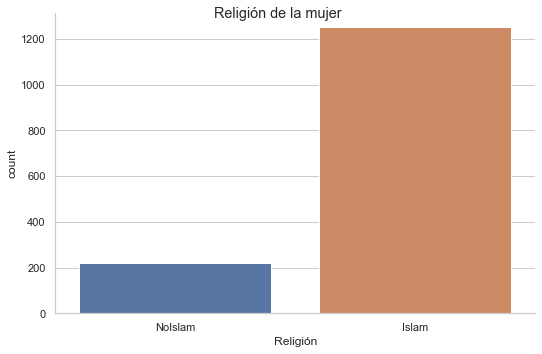

In [16]:
#Religión de las mujeres
wifeReligion = sns.catplot('wifeReligion', data=rawData, kind='count', aspect=1.5)
wifeReligion.set_xlabels('Religión')
wifeReligion.set_xticklabels(["NoIslam", "Islam"])
wifeReligion.fig.suptitle('Religión de la mujer')

##mas de 1200 mujeres profesan la religión Islam.  Un poco mas de 200 no profesan el Islam como religión.


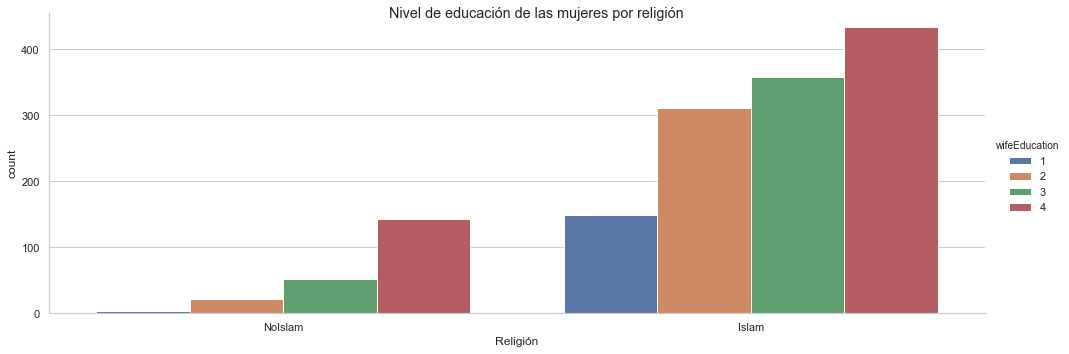

In [17]:
#Nivel de educación de las mujeres por religión
religion_educacion = sns.catplot('wifeReligion', data=rawData, hue='wifeEducation', kind='count', aspect=2.75)
religion_educacion.fig.suptitle('Nivel de educación de las mujeres por religión')
religion_educacion.set_xticklabels(["NoIslam", "Islam"])
religion_educacion.set_xlabels('Religión')

## Mayoritariamente las mujeres con un nivel educativo alto(4) practican el Islam, ademas esto se mantiene
## para el resto de los niveles educativos y si profesan el Islam o no.
## Para las mujeres que no profesan el Islam casi ninguna de ellas tiene nivel educativo bajo.


Text(0.5, 0.98, 'Mujeres que trabajan')

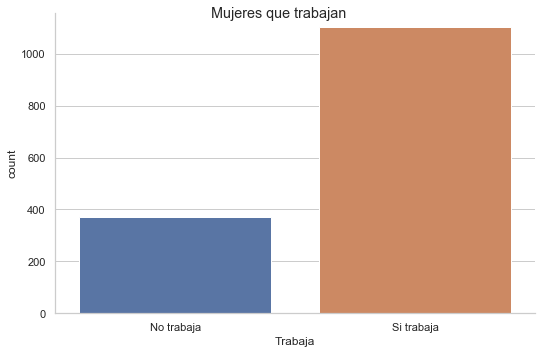

In [18]:
#Mujeres que trabajan
wifeWorking = sns.catplot('wifeWorking', data=rawData, kind='count', aspect=1.5)
wifeWorking.set_xlabels('Trabaja')
wifeWorking.set_xticklabels(["No trabaja", "Si trabaja"])
wifeWorking.fig.suptitle('Mujeres que trabajan')

## Mas de 1000 mujeres si trabaja fuera del hogar siendo estas la mayoria.

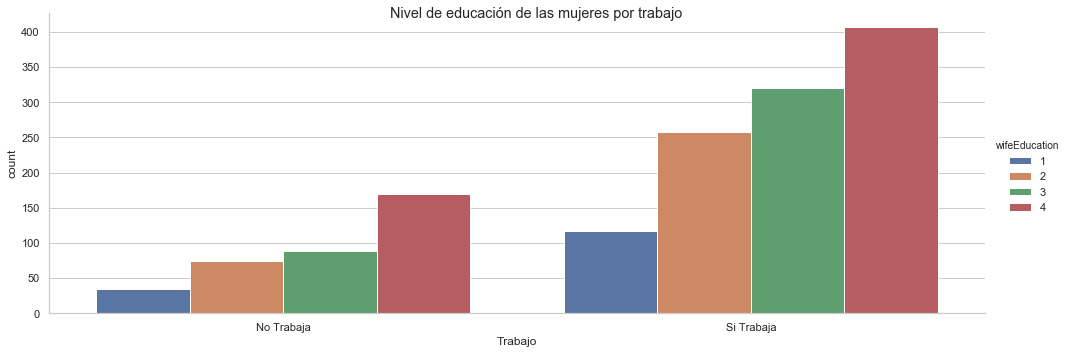

In [19]:
#Nivel de educacion de las mujeres y trabajo
trabajo_educacion = sns.catplot('wifeWorking', data=rawData, hue='wifeEducation', kind='count', aspect=2.75)
trabajo_educacion.fig.suptitle('Nivel de educación de las mujeres por trabajo')
trabajo_educacion.set_xticklabels(["No Trabaja", "Si Trabaja"])
trabajo_educacion.set_xlabels('Trabajo')

##Las mujeres que si trabajan son la mayoria, de estas la mayoria tiene un nivel educativo alto, el nivel medio
##educativo lo componen alrededor de 600 mujeres.

## Menos de 200 mujeres con nivel educativo alto no trabajan,  ademas los niveles de bajo a medio de mujeres que no
##trabajan suman alrededor de 250.

Text(0.5, 0.98, 'Ocupación de los hombres')

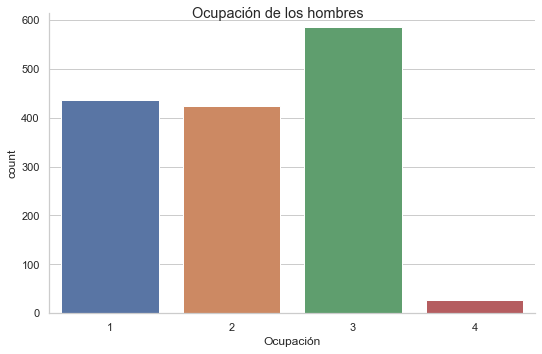

In [20]:
#Ocupacion de los hombres
husbandOccupation = sns.catplot('husbandOccupation', data=rawData, kind='count', aspect=1.5)
husbandOccupation.set_xlabels('Ocupación')
husbandOccupation.set_xticklabels(["1", "2", "3", "4"])
husbandOccupation.fig.suptitle('Ocupación de los hombres')

##La ocupación 3 representa casi 600 y la mayor.  las ocupaciones 1 y2 ambas superan a la ocupación 3 sumando casi 800.


Text(0.5, 0.98, 'Estandar de vida')

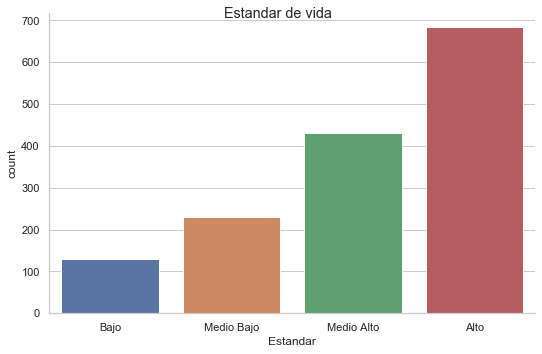

In [21]:
#Estandar de vida
standardLiving = sns.catplot('standardLiving', data=rawData, kind='count', aspect=1.5)
standardLiving.set_xlabels('Estandar')
standardLiving.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
standardLiving.fig.suptitle('Estandar de vida')

##El estandar de vida alto alcanza casi los 700, el medio ronda los 400 y los niveles medio bajo y bajo rondan los 300.

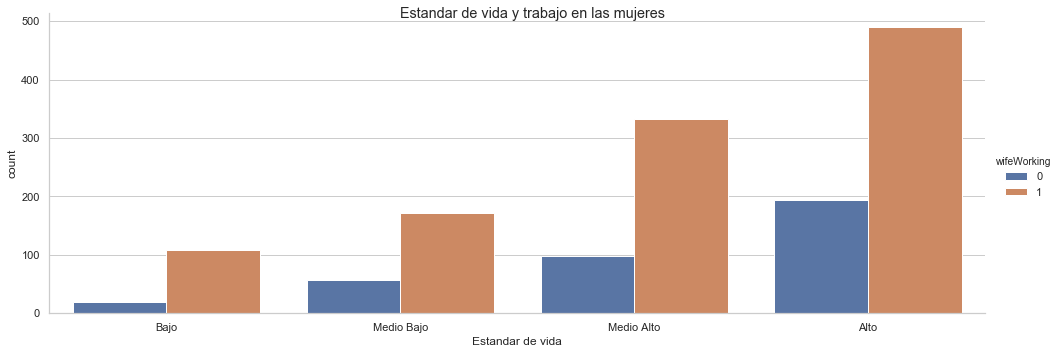

In [22]:
#Estandar de vida y tabajo en las mujeres
trabajo_estandarVida = sns.catplot('standardLiving', data=rawData, hue='wifeWorking', kind='count', aspect=2.75)
trabajo_estandarVida.fig.suptitle('Estandar de vida y trabajo en las mujeres')
trabajo_estandarVida.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
trabajo_estandarVida.set_xlabels('Estandar de vida')

##Las mujeres que trabajan tienen un mayor estandar de vida alto,  las mujeres que no trabajan reflejan un estandar
## de vida bajo  en relación con las que si trabajan.

Text(0.5, 0.98, 'Exposición a medios')

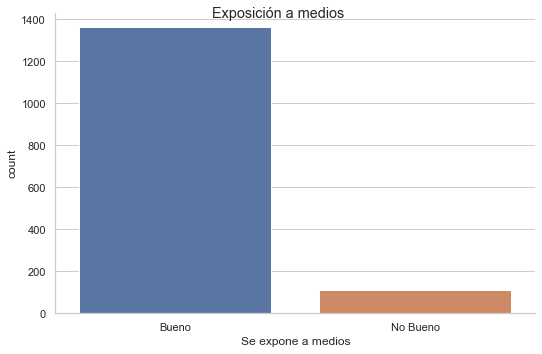

In [23]:
#Exposicion a medios

mediaExposure = sns.catplot('mediaExposure', data=rawData, kind='count', aspect=1.5)
mediaExposure.set_xlabels('Se expone a medios')
mediaExposure.set_xticklabels(["Bueno", "No Bueno"])
mediaExposure.fig.suptitle('Exposición a medios')

##La mayoria de mujeres esta expuesta a influencia de los medios de comunicación masiva.


Text(0.5, 0.98, 'Método anticonceptivo usado')

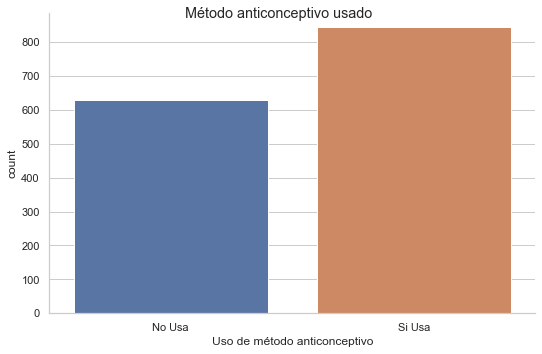

In [24]:
#Metodo anticonceptivo usado 1=No-use 2=Si usa

contraceptiveUsed = sns.catplot('contraceptiveUsed', data=rawData, kind='count', aspect=1.5)
contraceptiveUsed.set_xlabels('Uso de método anticonceptivo')
contraceptiveUsed.set_xticklabels(["No Usa", "Si Usa"])
contraceptiveUsed.fig.suptitle('Método anticonceptivo usado')

##La mayoría de mujeres no usan método anticonceptivo. 

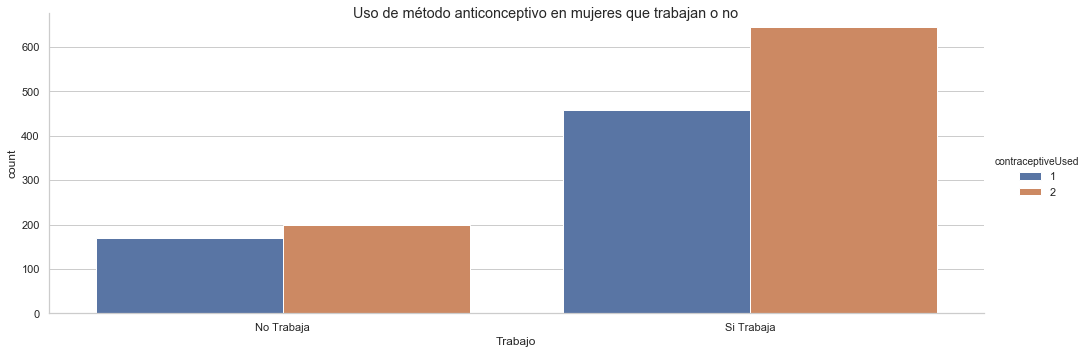

In [25]:
#Uso de metodo anticonceptivo en mujeres que trabajan o no
trabajo_contraceptiveUsed = sns.catplot('wifeWorking', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
trabajo_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres que trabajan o no')
trabajo_contraceptiveUsed.set_xticklabels(["No Trabaja", "Si Trabaja"])
trabajo_contraceptiveUsed.set_xlabels('Trabajo')

##La mayoría de las mujeres que si trabajan fuera del hogar si utilizan  metodo anticonceptivo.
## sin embargo el no uso de anticonceptivo en las mujeres que si trabajan fuera del hogar
##es mayor que el de las mujeres que no trabajan fuera del hogar.

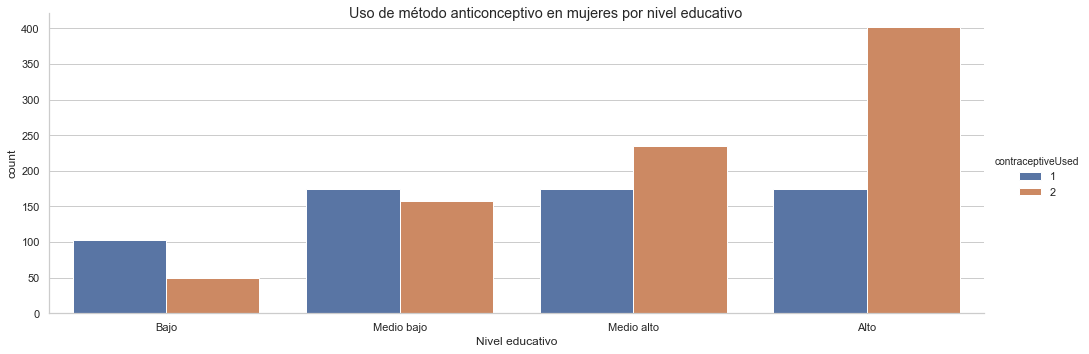

In [26]:
#Uso de metodo anticonceptivo en mujeres por nivel educativo
nivelEducativo_contraceptiveUsed = sns.catplot('wifeEducation', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
nivelEducativo_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por nivel educativo')
nivelEducativo_contraceptiveUsed.set_xticklabels(["Bajo", "Medio bajo", "Medio alto", "Alto"])
nivelEducativo_contraceptiveUsed.set_xlabels('Nivel educativo')

##Se observa que las mujeres de nivel educativo alto utilizan métodos anticonceptivos mayormente. En contraposicion
##con el nivel bajo en el cual la mayoria no utiliza ningun medio anticonceptivo.
##También se observa que alrededor de 175 de ellas no utilizan ningún método anticonceptivo.

## En el nivel educativo medio alto la mayoría de las mujeres si utilizan método anticonceptivo.
#En el nivel educativo medio Bajo la mayoría de las mujeres no utilizan método anticonceptivo.



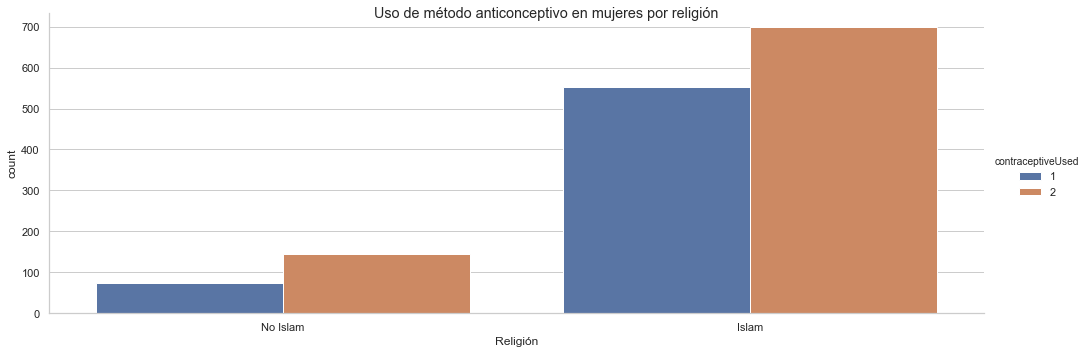

In [27]:
#Uso de metodo anticonceptivo en mujeres por religion
wifeReligion_contraceptiveUsed = sns.catplot('wifeReligion', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeReligion_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por religión')
wifeReligion_contraceptiveUsed.set_xticklabels(["No Islam", "Islam"])
wifeReligion_contraceptiveUsed.set_xlabels('Religión')

##La mayoría de las mujeres independientemente de la religión que profesan utilizan algun medio anticonceptivo.
## Alrededor de 550 mujeres que profesan el Islam no utilzan ningun medio anticonceptivo.



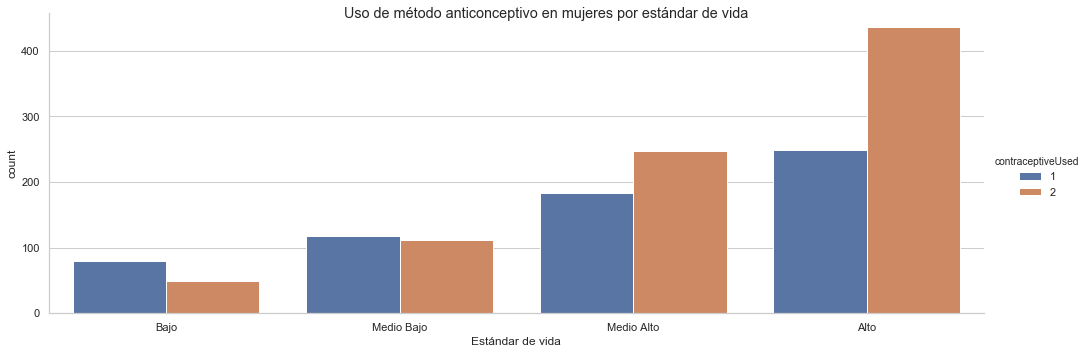

In [28]:
#Uso de metodo anticonceptivo en mujeres por estandar de vida
standardLiving_contraceptiveUsed = sns.catplot('standardLiving', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
standardLiving_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por estándar de vida')
standardLiving_contraceptiveUsed.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
standardLiving_contraceptiveUsed.set_xlabels('Estándar de vida')

##Las mujeres con estándar de vida Medio alto y Alto, mayoritariamente utilizan método anticonceptivo.
## En los nivel bajo y Medio bajo la mayoria no utiliza ningun medio anticonceptivo


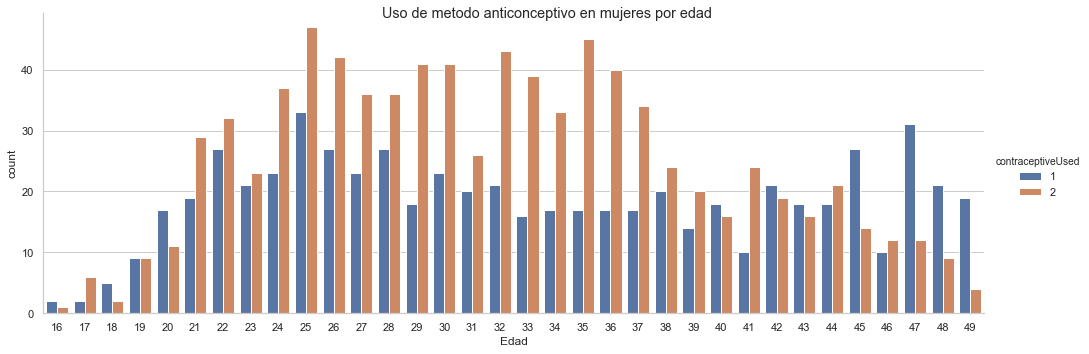

In [30]:
#Uso de metodo anticonceptivo en mujeres por edad
wifeAge_contraceptiveUsed = sns.catplot('wifeAge', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeAge_contraceptiveUsed.fig.suptitle('Uso de metodo anticonceptivo en mujeres por edad')
wifeAge_contraceptiveUsed.set_xlabels('Edad')

## las mujeres desde los 21 a los 39 años  utilizan algun método anticonceptivo.
## Las mujeres mayores de 39 tienen mayor preferencia por no utilizar método anticonceptivo.


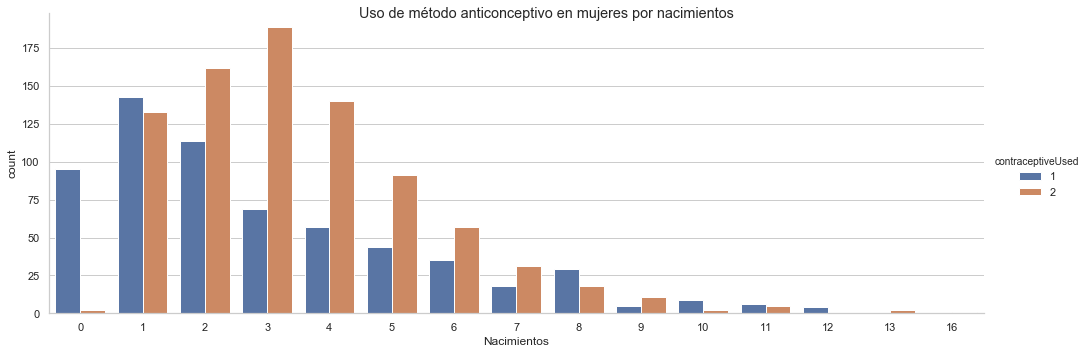

In [31]:
#Uso de metodo anticonceptivo en mujeres por nacimientos
numberChildren_contraceptiveUsed = sns.catplot('numberChildren', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
numberChildren_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por nacimientos')
numberChildren_contraceptiveUsed.set_xlabels('Nacimientos')

##
## de 0 a 1 nacimientos prefieren no utilizar ningun método anticonceptivo
## de 3 a 7 nacimientos prefieren utilizar método anticonceptivo.
## nacimientos mayores e iguales a 8, prefieren no utilizar ningun metodo anticonceptivo


In [32]:
###################################Recopilación de datos, preprocesamiento e ingeniería de características

In [33]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
wifeAge              1472 non-null int64
wifeEducation        1472 non-null int64
husbandEducation     1472 non-null int64
numberChildren       1472 non-null int64
wifeReligion         1472 non-null int64
wifeWorking          1472 non-null int64
husbandOccupation    1472 non-null int64
standardLiving       1472 non-null int64
mediaExposure        1472 non-null int64
contraceptiveUsed    1472 non-null int64
dtypes: int64(10)
memory usage: 115.1 KB


In [34]:
#Categorizando las variables

# Se crean compartimentos para la EDAD de la esposa, usando la funcion cut de pandas,
#se definen los compartimentos deseados unidades de 10.
rawData['wifeAge'] = pd.cut(rawData['wifeAge'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]).cat.codes
rawData['wifeEducation'] = rawData['wifeEducation'].astype('category')
rawData['husbandEducation'] = rawData['husbandEducation'].astype('category')
rawData['husbandOccupation'] = rawData['husbandOccupation'].astype('category')
rawData['standardLiving'] = rawData['standardLiving'].astype('category')
rawData['contraceptiveUsed'] = rawData['contraceptiveUsed'].astype('category')



In [35]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
wifeAge              1472 non-null int8
wifeEducation        1472 non-null category
husbandEducation     1472 non-null category
numberChildren       1472 non-null int64
wifeReligion         1472 non-null int64
wifeWorking          1472 non-null int64
husbandOccupation    1472 non-null category
standardLiving       1472 non-null category
mediaExposure        1472 non-null int64
contraceptiveUsed    1472 non-null category
dtypes: category(5), int64(4), int8(1)
memory usage: 55.6 KB


In [36]:
rawData.head()

,wifeAge,wifeEducation,husbandEducation,numberChildren,wifeReligion,wifeWorking,husbandOccupation,standardLiving,mediaExposure,contraceptiveUsed
0,3,1,3,10,1,1,3,4,0,1
1,3,2,3,7,1,1,3,4,0,1
2,3,3,2,9,1,1,3,3,0,1
3,2,3,3,8,1,1,3,2,0,1
4,0,4,4,0,1,1,3,3,0,1


In [37]:
#Variable Dependiente
dependiente = rawData['contraceptiveUsed']

In [38]:
#Entrenamiento
X_train = rawData.iloc[:,0:9]
X_train.shape


(1472, 9)

In [39]:
#Dependent Variable Training Set (y Training)
y_train = dependiente
y_train.shape

(1472,)

In [40]:
X_train, X_test, y_train, y_test = split(X_train,y_train)

In [41]:
#dimensionamiento del arreglo para entrenamiento y prueba
X_train.shape,X_test.shape


((1104, 9), (368, 9))

In [42]:
###################################Modelización predictiva y evaluación

In [43]:
#K-nearest neighbors (KNN)
#BallTree: para problemas rápidos generalizados de punto N
#Leaf_size: Número de puntos en los que cambiar a fuerza bruta.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



mdl_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=40)
mdl_knn = mdl_knn.fit(X_train, y_train)
pred_knn = mdl_knn.predict(X_test)

print ("KNN exactitud: ",accuracy_score(y_test, pred_knn))

KNN exactitud:  0.654891304347826


In [44]:
###################################Cross Validation
print(cross_val_score(mdl_knn, X_train, y_train)) 

[0.67479675 0.6548913  0.6866485 ]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [45]:
#Naïve Bayes es uno de los clasificadores más utilizados por su simplicidad y rapidez. 
#Se trata de una técnica de clasificación
#y predicción supervisada que construye modelos que predicen la probabilidad de posibles resultados

from sklearn.naive_bayes import GaussianNB

mdl_gnb = GaussianNB()
mdl_gnb.fit(X_train, y_train)
pred_gnb = mdl_gnb.predict(X_test)
print ("NaiveBayes exactitud: ",accuracy_score(y_test, pred_gnb))



NaiveBayes exactitud:  0.6086956521739131


In [46]:
###################################Cross Validation
print(cross_val_score(mdl_gnb, X_train, y_train)) 

[0.62872629 0.62771739 0.66212534]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [47]:
##Support vector machine (SVM)

mdl_svc=LinearSVC(max_iter=6500)
mdl_svc.fit(X_train,y_train)
pred_svc = mdl_svc.predict(X_test)
print ("Support vector machine exactitud: ",accuracy_score(y_test, pred_svc))


Support vector machine exactitud:  0.6630434782608695


In [48]:
###################################Cross Validation
print(cross_val_score(mdl_svc, X_train, y_train)) 

/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.63685637 0.67934783 0.67847411]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:

#Algoritmo a utilizar en el problema de optimización.Para problemas multiclase, 
#solo 'newton-cg', 'sag', 'saga' y 'lbfgs' manejan la pérdida multinomial

mdl_lrm=LogisticRegression(multi_class="multinomial",solver ="lbfgs")
mdl_lrm=mdl_lrm.fit(X_train,y_train)
pred_lrm = mdl_lrm.predict(X_test)
print ("Logistic Regression exactitud: ",accuracy_score(y_test, pred_lrm))



Logistic Regression exactitud:  0.6711956521739131


In [50]:
###################################Cross Validation
print(cross_val_score(mdl_lrm, X_train, y_train))

[0.63685637 0.68478261 0.68392371]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [51]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: numero de arboles en el bosque
# max_depth:La profundidad máxima del árbol. 
# 
mdl_RF = RandomForestClassifier(n_estimators=500, max_depth=5)

mdl_RF.fit(X_train, y_train)
pred_RF = mdl_RF.predict(X_test)
print ("RF exactitud: ",accuracy_score(y_test, pred_RF))

RF exactitud:  0.7309782608695652


In [52]:
###################################Cross Validation
print(cross_val_score(mdl_RF, X_train, y_train))

/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.66395664 0.68206522 0.71389646]


In [53]:
###################################Modelo de clasificacion seleccionado

In [54]:
#RandomForest con n_estimators=500, max_depth=5 tiene el mejor desempeño con una exactitud de 0.73

In [55]:
#RandomForest mas informacion posterior a la seleccion del modelo
#Probablidades de las clase predichas

mdl_RF.predict_proba(X_test)


array([[0.43276564, 0.56723436],
       [0.43552699, 0.56447301],
       [0.56358946, 0.43641054],
       [0.2556577 , 0.7443423 ],
       [0.6934688 , 0.3065312 ],
       [0.35126843, 0.64873157],
       [0.41113503, 0.58886497],
       [0.8980409 , 0.1019591 ],
       [0.28106449, 0.71893551],
       [0.42900137, 0.57099863],
       [0.86222139, 0.13777861],
       [0.88941428, 0.11058572],
       [0.27870616, 0.72129384],
       [0.22775867, 0.77224133],
       [0.36389917, 0.63610083],
       [0.45022248, 0.54977752],
       [0.86467999, 0.13532001],
       [0.49716445, 0.50283555],
       [0.41803116, 0.58196884],
       [0.36471267, 0.63528733],
       [0.33411825, 0.66588175],
       [0.4137024 , 0.5862976 ],
       [0.64716652, 0.35283348],
       [0.8969512 , 0.1030488 ],
       [0.44136516, 0.55863484],
       [0.33414947, 0.66585053],
       [0.40370509, 0.59629491],
       [0.74290823, 0.25709177],
       [0.57217272, 0.42782728],
       [0.86917773, 0.13082227],
       [0.

In [56]:
#n_classes_:El número de clases (problema de salida única) o 
#una lista que contiene el número de clases para cada salida (problema de salida múltiple).
print(mdl_RF.n_classes_)

2


In [57]:
#RandomForest mas informacion posterior a la seleccion del modelo
#Devuelve la precisión media en los datos de prueba y las etiquetas dadas.
mdl_RF.score(X_train,y_train)

0.7391304347826086

In [58]:
mdl_RF.decision_path(X_train)

(<1104x21440 sparse matrix of type '<class 'numpy.int64'>'
 	with 3245589 stored elements in Compressed Sparse Row format>,
 array([    0,    49,    82,   113,   148,   189,   244,   281,   334,
          379,   438,   475,   506,   559,   604,   635,   686,   727,
          764,   799,   846,   885,   916,   959,  1014,  1047,  1086,
         1133,  1166,  1215,  1254,  1293,  1342,  1391,  1444,  1491,
         1544,  1589,  1630,  1687,  1720,  1773,  1808,  1843,  1890,
         1939,  1976,  2011,  2044,  2073,  2104,  2141,  2188,  2217,
         2254,  2305,  2344,  2395,  2442,  2473,  2504,  2549,  2610,
         2663,  2712,  2745,  2776,  2833,  2876,  2931,  2986,  3039,
         3070,  3107,  3162,  3195,  3228,  3281,  3334,  3371,  3410,
         3459,  3514,  3563,  3608,  3653,  3710,  3747,  3794,  3843,
         3902,  3947,  3992,  4025,  4062,  4105,  4154,  4185,  4238,
         4273,  4332,  4373,  4404,  4449,  4500,  4539,  4584,  4633,
         4666,  4717,  4

In [59]:
#Reporte de resultados de clasificacion
target_names = ['No-use' , 'Si usa']
print(classification_report(y_test, pred_RF, target_names=target_names))

              precision    recall  f1-score   support

      No-use       0.81      0.47      0.60       156
      Si usa       0.70      0.92      0.80       212

    accuracy                           0.73       368
   macro avg       0.76      0.70      0.70       368
weighted avg       0.75      0.73      0.71       368



In [60]:
# Matriz de confusion
from sklearn.metrics import multilabel_confusion_matrix
print(confusion_matrix(y_test, pred_RF))


[[ 74  82]
 [ 17 195]]


In [61]:
###################################Factores de importancia usando Random Forest

In [62]:
print(mdl_RF.feature_importances_)

[0.12372689 0.20020909 0.07042094 0.39744825 0.01327667 0.01736392
 0.03884033 0.0829319  0.055782  ]


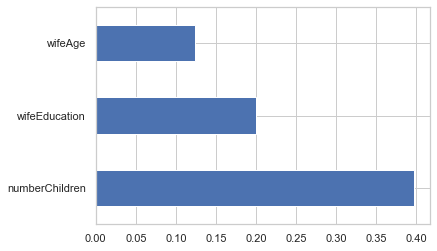

In [63]:
# Factores de importancia
(pd.Series(mdl_RF.feature_importances_, index=X_train.columns)
   .nlargest(3)
   .plot(kind='barh'))
plt.savefig('feature_importances')

# se muestra que el modelo ha determinado que la edad, el nivel educativo y 
# cantidad de niños nacidos son factoresde importancia.

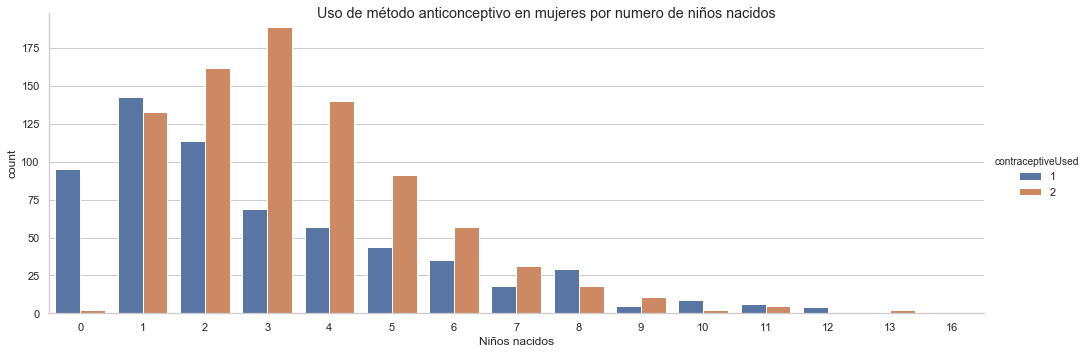

In [64]:
#Uso de método anticonceptivo en mujeres por numero de niños nacidos
numberChildren_contraceptiveUsed = sns.catplot('numberChildren', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
numberChildren_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por numero de niños nacidos')
numberChildren_contraceptiveUsed.set_xlabels('Niños nacidos')
plt.savefig('numberChildren_contraceptiveUsed')


## de 0 a 1 nacimientos prefieren no utilizar ningun método anticonceptivo
## de 3 a 7 nacimientos prefieren utilizar método anticonceptivo.
## nacimientos mayores e iguales a 8, prefieren no utilizar ningun metodo anticonceptivo

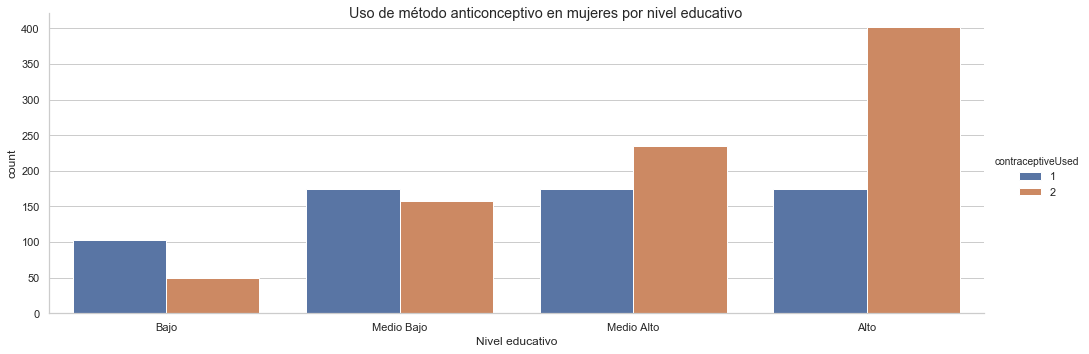

In [65]:
#Uso de metodo anticonceptivo en mujeres por nnivel educativo
wifeEducation_contraceptiveUsed = sns.catplot('wifeEducation', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeEducation_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por nivel educativo')
wifeEducation_contraceptiveUsed.set_xlabels('Nivel educativo')
wifeEducation_contraceptiveUsed.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
plt.savefig('wifeEducation_contraceptiveUsed')
##En el nivel educativo Medio alto y Alto las mujeres utilizan mayoritariamente método anticonceptivo.
##En los 2 niveles educativos Bajo y Medio Bajo no utilizan método anticonceptivo.


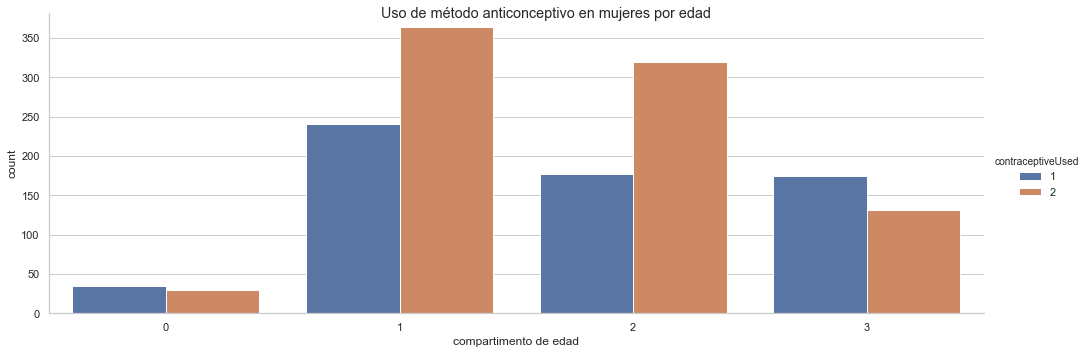

In [67]:
#Uso de metodo anticonceptivo en mujeres por edad
wifeAge_contraceptiveUsed = sns.catplot('wifeAge', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeAge_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por edad')
wifeAge_contraceptiveUsed.set_xlabels('compartimento de edad')
plt.savefig('wifeAge_contraceptiveUsed')
##En el compartimento de edad 1 y 2 utiliza algun método anticonceptivo.
##En el compartimento de edad 0 y 3 no utiliza ningun método anticonceptivo.